## Data Exploration

#### *Importing the Data*


It's essential that we conduct a comprehensive examination of all our datasets and database tables. The data sources we are working with include:

- IMDB

- TheMovieDB

- Rotten Tomatoes Movies

- Rotten Tomatoes Critic Reviews

- Box Office Mojo

- The Numbers

- im.db (SQLite database)

Data exploration helps us understand the structure, quality, and patterns within the data. By examining things like missing values, duplicates, and relationships between variables, we can detect potential issues early. This allows us to plan effective cleaning and transformation steps, laying a solid foundation for accurate and meaningful analysis. 

Below are the steps followed:


In [109]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
# Establish a connection to the database
conn = sqlite3.connect('Data/im.db')

# Check available tables (optional, good for understanding structure)
pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


In [111]:
# Close connection
conn.close()

In [112]:
bom_df = pd.read_csv('Data/bom.movie_gross.csv')
bom_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [113]:
rt_rev_df = pd.read_csv('Data\\rotten_tomatoes_critic_reviews.csv')
rt_rev_df.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


In [114]:
rt_df = pd.read_csv('Data\\rotten_tomatoes_movies.csv')

rt_df.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [115]:
tmdb_df = pd.read_csv('Data/tmdb.movies.csv')
tmdb_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [116]:
tn_df = pd.read_csv('Data/tn.movie_budgets.csv')
tn_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


Data Cleaning and Preparation
Before performing any meaningful analysis, it's crucial to thoroughly prepare and clean the data. Although our initial data exploration verified that the datasets are of high quality, they originate from diverse sources. As part of the preparation process, we need to filter key columns, standardize field names, address duplicates, and merge datasets when required.

Preparing Rotten Tomatoes Ratings and Genres Data
To analyze how movie genres and ratings relate to potential success, we will process and refine the Rotten Tomatoes Movies dataset. This dataset contains comprehensive metadata from the Rotten Tomatoes website, covering a diverse collection of films. The information it provides will be crucial for addressing our business questions about audience preferences and genre-based trends

Ratings and Genres Data Extraction
For our analysis of movie success and audience perception, we concentrate on four critical columns from the dataset:

movie_title: The official title of the film as recorded on Rotten Tomatoes.

genres: A comma-separated string categorizing each movie into one or more genres (e.g., Drama, Comedy, Action).

audience_rating: The average audience score, typically scaled from 0 to 100.

tomatometer_rating: The percentage of favorable professional critic reviews.

During data preparation, special attention is required for movies classified under multiple genres to ensure proper parsing and accurate analysis.

In [117]:
# Extracting the relevant columns
df_rt = rt_df[["movie_title","genres","audience_rating","tomatometer_rating"]].copy()

# Convert the comma-separated string into a list
df_rt['genres'] = df_rt['genres'].str.split(', ')

# Exploding the genres
rt_movies_exploded = df_rt.explode('genres').reset_index(drop=True)
rt_movies_exploded.head()

,movie_title,genres,audience_rating,tomatometer_rating
0,Percy Jackson & the Olympians: The Lightning T...,Action & Adventure,53.0,49.0
1,Percy Jackson & the Olympians: The Lightning T...,Comedy,53.0,49.0
2,Percy Jackson & the Olympians: The Lightning T...,Drama,53.0,49.0
3,Percy Jackson & the Olympians: The Lightning T...,Science Fiction & Fantasy,53.0,49.0
4,Please Give,Comedy,64.0,87.0


We perform an operation to split the genres column, creating separate rows for each genre entry. This process converts the one-to-many relationships between movies and their genres into simpler one-to-one relationships, facilitating genre-specific analysis. Following this transformation, we reset the DataFrame index to maintain proper data organization and ensure clean dataset structure.

In [118]:
# Comparing the number of rows for main df and the exploded df 
print(f"main: {rt_df.shape[0]} rows")
print(f"exploded: {rt_movies_exploded.shape[0]} rows")

main: 17712 rows
exploded: 39388 rows


By comparing row counts between the original and transformed DataFrames, we can validate the successful separation of multi-genre entries. The expected increase in row count confirms that each genre has been properly isolated into distinct records

In [119]:
# Seeing if the number of unique movie_title values matches with the main
print(f"exploded: {len(rt_movies_exploded['movie_title'].unique())} unique values")
print(f"main df: {len(rt_df['movie_title'].unique())} unique values")

exploded: 17106 unique values
main df: 17106 unique values


We confirm data integrity by checking that unique movie title counts match between datasets before and after transformation, ensuring no films were duplicated or lost during genre separation

Data Cleaning
Our preliminary analysis verified that the key columns of interest; genres, audience_rating, and tomatometer rating to maintain complete data integrity with no duplicate entries. Each field contains distinct measurements, confirming proper data structure.
We did identify a negligible proportion of missing values, representing only 0-1% of records across these columns. Given this minimal occurrence, we can confidently address these gaps through removing rows without compromising the dataset's statistical reliability or analytical value.


In [120]:
# Checking if missing values align with data exploration findings
(rt_movies_exploded.isna().sum()/len(rt_movies_exploded)*100)

movie_title           0.000000
genres                0.048238
audience_rating       1.241495
tomatometer_rating    0.233574
dtype: float64

We confirm that the missing values align with our previous findings. We proceed with dropping the rows containing missing values.

In [121]:
# Dropping rows with missing values under 'genres', 'audience_rating', and 'tomatometer_rating'
rt_movies_exploded_cleaned = (
    rt_movies_exploded
    .dropna(subset=["genres", "audience_rating", "tomatometer_rating"])
    .reset_index(drop=True)
)

# Checking if there are any missing values left
rt_movies_exploded_cleaned.isna().sum()

movie_title           0
genres                0
audience_rating       0
tomatometer_rating    0
dtype: int64

Checking for Outliers
We will use the Interquartile Range (IQR) method to check for outliers:

IQR = Q3 - Q1
Any data point below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR is considered an outlier.

We will apply this logic to audience_rating and tomatometer_rating

In [122]:
# Checking for outliers
def check_outliers(q1,q3,min,max):
    iqr=q3-q1
    upper_bound=q3+(1.5*iqr)
    lower_bound=q1-(1.5*iqr)
    if (min>lower_bound) & (max<upper_bound):
     return("There are no outliers")
    else:
     return("There are outliers")
 
# Checking in the audience_rating column
print(f"{check_outliers(q1=46,q3=78,min=0,max=100)} in the audience rating column")

# Checking in the tomatometer_rating column
print(f"{check_outliers(q1=40,q3=86,min=0,max=100)} in the tomatometer rating column")

There are no outliers in the audience rating column
There are no outliers in the tomatometer rating column


Standardization
This helps to avoid inconsistencies during grouping, searching, or filtering. (e.g., "Drama" and "drama" would otherwise be treated differently). We standardize text data by converting movie_title and genres columns to lowercase.

In [123]:
# Making sure to work on a copy to avoid the SettingWithCopyWarning
rt_movies_exploded_cleaned = rt_movies_exploded_cleaned.copy()

# Standardizing columns to lowercase
rt_movies_exploded_cleaned["genres"] = rt_movies_exploded_cleaned["genres"].str.lower()
rt_movies_exploded_cleaned["movie_title"] = rt_movies_exploded_cleaned["movie_title"].str.lower()

rt_movies_exploded_cleaned.head()

,movie_title,genres,audience_rating,tomatometer_rating
0,percy jackson & the olympians: the lightning t...,action & adventure,53.0,49.0
1,percy jackson & the olympians: the lightning t...,comedy,53.0,49.0
2,percy jackson & the olympians: the lightning t...,drama,53.0,49.0
3,percy jackson & the olympians: the lightning t...,science fiction & fantasy,53.0,49.0
4,please give,comedy,64.0,87.0


Grouping Ratings by Genre
To identify trends in how different genres perform, we grouped the movies by category and calculated average ratings from both audiences and critics. This gives us the big picture on which types of films viewers and reviewers prefer, rather than getting stuck on individual movie scores.

In [124]:
# Grouping by genres and aggregating the mean of audience_rating and tomatometer_rating
genre_rating_df = rt_movies_exploded_cleaned.groupby('genres').agg({
    'audience_rating': 'mean',
    'tomatometer_rating': 'mean'
}).reset_index()

# Formatting the ratings to show only one decimal place
genre_rating_df['audience_rating'] = genre_rating_df['audience_rating'].round(1)
genre_rating_df['tomatometer_rating'] = genre_rating_df['tomatometer_rating'].round(1)

genre_rating_df

,genres,audience_rating,tomatometer_rating
0,action & adventure,57.9,54.2
1,animation,65.7,64.1
2,anime & manga,75.0,75.4
3,art house & international,66.5,71.0
4,classics,71.0,78.4
5,comedy,58.4,55.1
6,cult movies,55.8,60.5
7,documentary,73.3,80.9
8,drama,63.1,63.2
9,faith & spirituality,70.3,63.9


In [125]:
# Confirming no genres were lost after aggregation
len(rt_movies_exploded_cleaned['genres'].value_counts()) == len(genre_rating_df)

True

Preparing Genres and ROI Data
In this section, we will focus on preparing two key components: genres and Return on Investment (ROI). Both are essential for understanding the financial success and audience preferences of movies
We'll be working with two key datasets:

Movie budgets (tn.movie_budgets): Shows what each film cost to make (Production Budget), how much it earned globally (Worldwide Gross), and its Return on Investment (ROI).

Movie genres (rt_movies): Tells us what categories each film falls into, like Action, Comedy, or Drama.

Why does this matter? It help us understand what kinds of stories audiences love most. ROI shows us which films gave studios value for money. By connecting these dots, we can figure out which types of movies are both popular AND profitable.

Merging Appropriate Tables
We will merge the tn.movie_budgets dataset (which contains production budgets and worldwide gross revenue) with the rt_movies dataset (which includes genre information) to create a consolidated table that includes both genres and ROI for each movie.

In [126]:
# Prepare movie titles for better matching (remove special characters, lower case)
tn_df['movie'] = tn_df['movie'].str.strip().str.lower()
rt_df['movie_title'] = rt_df['movie_title'].str.strip().str.lower()

# Merge the datasets on the appropriate columns
merged_df = tn_df.merge(rt_df[['movie_title', 'genres']], left_on='movie', right_on='movie_title', how='left')

# Drop duplicate movie_title column if you want
merged_df = merged_df.drop(columns=['movie_title'])

merged_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,genres
0,1,"Dec 18, 2009",avatar,"$425,000,000","$760,507,625","$2,776,345,279","Action & Adventure, Comedy, Mystery & Suspense..."
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000","$241,063,875","$1,045,663,875","Action & Adventure, Comedy, Science Fiction & ..."
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000","$42,762,350","$149,762,350","Action & Adventure, Drama, Science Fiction & F..."
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000","$459,005,868","$1,403,013,963","Action & Adventure, Science Fiction & Fantasy"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000","$620,181,382","$1,316,721,747",NaN


ROI Computation
ROI is a key financial metric that helps us assess the profitability of a film relative to its production cost. By calculating the ROI for each movie, we better understand which films have been the most financially successful and use that insight to inform future production decisions.

The calculation of ROI will be based on the formula:

ROI = (Worldwide Gross - Production Budget) ÷ Production Budget × 100

In [127]:
# Clean up the dollar signs and commas and convert columns to numeric
merged_df['production_budget'] = merged_df['production_budget'].replace([r'[\$,]'], '', regex=True).astype(float)
merged_df['worldwide_gross'] = merged_df['worldwide_gross'].replace([r'[\$,]'], '', regex=True).astype(float)

# Calculate ROI
merged_df['ROI (%)'] = ((merged_df['worldwide_gross'] - merged_df['production_budget']) / merged_df['production_budget']) * 100

# Round ROI to nearest whole number
merged_df['ROI (%)'] = merged_df['ROI (%)'].round()

# Group by 'movie' and calculate the mean ROI (though each movie is unique here)
roi_grouped = merged_df.groupby('movie')[['ROI (%)']].mean().reset_index()

# Final table: Comparison between genres and the grouped movie ROI, while keeping the production_budget and worldwide_gross columns
final_table = merged_df[['genres', 'movie', 'production_budget', 'worldwide_gross']].merge(roi_grouped, on='movie')

final_table.head()

,genres,movie,production_budget,worldwide_gross,ROI (%)
0,"Action & Adventure, Comedy, Mystery & Suspense...",avatar,425000000.0,2.776345e+09,553.0
1,"Action & Adventure, Comedy, Science Fiction & ...",pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
2,"Action & Adventure, Drama, Science Fiction & F...",dark phoenix,350000000.0,1.497624e+08,-57.0
3,"Action & Adventure, Science Fiction & Fantasy",avengers: age of ultron,330600000.0,1.403014e+09,324.0
4,NaN,star wars ep. viii: the last jedi,317000000.0,1.316722e+09,315.0


Handling Missing Values

In [128]:
final_table.isna().sum()

genres               1264
movie                   0
production_budget       0
worldwide_gross         0
ROI (%)                 0
dtype: int64

Since the genres column has 1264 missing values and is crucial for our analysis, we will drop these rows as they do not provide useful information for our objectives.

In [129]:
final_table.dropna(subset=['genres'], inplace=True)

Expanding Movies into Individual Genres
We aim to break down each movie's genre information to better understand how individual genres contribute to a movie's success. Since movies can belong to multiple genres, expanding the dataset to reflect each genre individually will allow us to analyze the performance of each genre separately.

In [130]:
# Split genres into a list
final_table['genres'] = final_table['genres'].str.split(',')

# Explode the list into separate rows
exploded_table = final_table.explode('genres')

# Remove extra spaces around genre names
exploded_table['genres'] = exploded_table['genres'].str.strip()
exploded_table

,genres,movie,production_budget,worldwide_gross,ROI (%)
0,Action & Adventure,avatar,425000000.0,2.776345e+09,553.0
0,Comedy,avatar,425000000.0,2.776345e+09,553.0
0,Mystery & Suspense,avatar,425000000.0,2.776345e+09,553.0
0,Science Fiction & Fantasy,avatar,425000000.0,2.776345e+09,553.0
1,Action & Adventure,pirates of the caribbean: on stranger tides,410600000.0,1.045664e+09,155.0
...,...,...,...,...,...
6223,Mystery & Suspense,following,6000.0,2.404950e+05,3908.0
6226,Comedy,my date with drew,1100.0,1.810410e+05,16358.0
6226,Documentary,my date with drew,1100.0,1.810410e+05,16358.0
6226,Special Interest,my date with drew,1100.0,1.810410e+05,16358.0


Cleaning and Grouping by Genres
We aim to clean the data and group the movies by their genres to calculate the average Return on Investment (ROI) for each genre. Cleaning the data ensures that we remove any rows with missing or invalid information. Sorting the data by ROI will help us identify the top-performing genres, providing valuable information for future movie production decisions.

In [131]:
# Drop rows with NULLs in important columns
exploded_table = exploded_table.dropna(subset=['genres', 'movie', 'ROI (%)'])

# Group by 'genres' and calculate average ROI, production_budget, and worldwide_gross
grouped_table = exploded_table.groupby('genres').agg({
    'ROI (%)': 'mean',              # Average ROI
    'production_budget': 'mean',    # Average production_budget
    'worldwide_gross': 'mean'       # Average worldwide_gross
}).reset_index()

# Sort by ROI in descending order
grouped_table = grouped_table.sort_values(by='ROI (%)', ascending=False)

# Reset index to clean it up
grouped_table = grouped_table.reset_index(drop=True)

grouped_table.head()

,genres,ROI (%),production_budget,worldwide_gross
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07
1,Horror,975.298217,2.464406e+07,7.716784e+07
2,Special Interest,932.209677,1.217236e+07,3.201614e+07
3,Documentary,868.586466,1.323879e+07,3.199423e+07
4,Classics,839.873684,3.186409e+07,1.034252e+08


Normalise ROI
We normalize the ROI (%) values so they collectively sum to 100%. This helps us interpret each genre's contribution to the total ROI as a percentage share.

In [132]:
Total_Roi = grouped_table['ROI (%)'].sum()

# Normalize the ROI values to ensure they sum to 100%
grouped_table['Normalized_ROI'] = (grouped_table['ROI (%)'] / Total_Roi) * 100

# Ensure the normalized values sum exactly to 100 by adjusting based on total
normalized_total = grouped_table['Normalized_ROI'].sum()
adjustment_factor = 100 / normalized_total

# Re-adjust the normalized ROIs to ensure they sum exactly to 100
grouped_table['Normalized_ROI'] = grouped_table['Normalized_ROI'] * adjustment_factor
grouped_table

,genres,ROI (%),production_budget,worldwide_gross,Normalized_ROI
0,Cult Movies,4669.958333,2.545846e+07,8.253467e+07,31.341139
1,Horror,975.298217,2.464406e+07,7.716784e+07,6.545445
2,Special Interest,932.209677,1.217236e+07,3.201614e+07,6.256269
3,Documentary,868.586466,1.323879e+07,3.199423e+07,5.829279
4,Classics,839.873684,3.186409e+07,1.034252e+08,5.636581
5,Sports & Fitness,740.619048,2.526810e+07,7.822937e+07,4.970461
6,Television,695.370370,2.903874e+07,8.745679e+07,4.666787
7,Faith & Spirituality,652.086957,1.010326e+07,1.855955e+07,4.376302
8,Animation,527.445783,8.096078e+07,2.969315e+08,3.539807
9,Musical & Performing Arts,509.462766,2.771714e+07,1.086628e+08,3.419119


Preparing Language and Popularity Data
By analyzing two key variables from The Movie DB dataset: original_language and popularity. The original_language column helps us understand which languages dominate box office performance, guiding strategic decisions about which language(s) to prioritize in production—either to reach the broadest audience or to tap into emerging markets. 
The popularity column offers insight into which films are most liked by audiences. By examining both these variables, we can uncover patterns between language, popularity, and potential box office future success.

In [133]:
tmdb_df.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


We utilized the Data Wrangler tool to inspect the columns of interest: original_language and popularity. We confirmed that both columns had no missing values, ensuring that our analysis would proceed without any gaps in the data.

Preparing Directors and Foreign Gross Data
From our earlier data exploration, we have confirmed that there are no missing values in the relevant im.db tables and in the Numbers movie budgets dataset, which will allow us to proceed without needing additional imputation steps. Since these datasets originate from different sources and structures, we will need to carefully filter and merge them to ensure accuracy.

Extracting Director and Movie Title Data
First, we'll pull a clean list of directors and their movies from the IMDb database. Director names live in the 'persons' table, while movie titles are in 'movie_akas', and they're connected through ID references in the 'directors' table.

We're being extra careful to avoid duplicates by using DISTINCT in our queries, because we spotted multiple copies of the same director-movie pairs, probably due to how the data was originally entered. By filtering for unique entries and sticking to original titles, we're making sure our final list is clean and reliable.

In [134]:
# Connect to the database
conn = sqlite3.connect('Data/im.db')

# Updated query with DISTINCT
query = '''
SELECT DISTINCT
    p.primary_name AS director_name,
    ma.title AS movie_title,
    mb.start_year
FROM directors d
JOIN persons p ON d.person_id = p.person_id
JOIN movie_akas ma ON d.movie_id = ma.movie_id
JOIN movie_basics mb ON d.movie_id = mb.movie_id
WHERE ma.is_original_title = 1
'''

# Execute the query and load into a DataFrame
Directors_df = pd.read_sql_query(query, conn)

# Close connection
conn.close()
Directors_df.head()

,director_name,movie_title,start_year
0,Colin Trevorrow,Jurassic World,2015
1,Andrew Stanton,John Carter,2012
2,Marc Jampolsky,Versailles Rediscovered - The Sun King's Vanis...,2019
3,Sam Zubrycki,Miguelito - Canto a Borinquen,2019
4,Henning Beckhoff,Thing I Don't Get,2018


Merging Directors with Worldwide Gross Data
Combining the director information with the worldwide gross earnings ensures that each movie in our dataset is matched with both its director and its revenue performance, setting the foundation for meaningful analysis.

In [135]:
# Rename for easy merge
Directors_df = Directors_df.rename(columns={'movie_title': 'movie'})

# bug fix: To resolve potential override and faulty merge
tn_df['movie'] = tn_df['movie'].str.lower()
Directors_df['movie'] = Directors_df['movie'].str.lower()

# Merge the two DataFrames
merged_df = pd.merge(tn_df[['movie', 'worldwide_gross']], Directors_df, on='movie', how='inner')

# Reorder columns
directors_fgross_df = merged_df[['movie', 'director_name', 'worldwide_gross', 'start_year']]

# Sort alphabetically by director name
directors_fgross_df = directors_fgross_df.sort_values(by='director_name').reset_index(drop=True)
directors_fgross_df

,movie,director_name,worldwide_gross,start_year
0,akira,A.R. Murugadoss,"$19,585",2016
1,bully,Aaron Alon,"$1,381,824",2017
2,restless,Aaron Boltz,"$2,772,511",2012
3,circle,Aaron Hann,"$10,024",2015
4,teen titans go! to the movies,Aaron Horvath,"$51,620,593",2018
...,...,...,...,...
2443,along the roadside,Zoran Lisinac,"$3,234",2013
2444,prophecy,Zuri Rinpoche,"$22,673,340",2015
2445,perfectos desconocidos,Álex de la Iglesia,"$31,166,312",2017
2446,9,Éric Tessier,"$48,559,999",2016


Aggregating Worldwide Gross Earnings by Director
We need to aggregate the data to eatablish for the fact that a single director may have multiple movies. This will give us a clearer picture of each director's overall financial impact.

In [136]:
# Remove commas, dollar sign and convert to float for calculation
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r',', '', regex=True)
directors_fgross_df['worldwide_gross'] = directors_fgross_df['worldwide_gross'].replace(r'\$', '', regex=True).astype(float)

# Group by director_name and sum worldwide_gross
agg_directors_df = directors_fgross_df.groupby('director_name', as_index=False)['worldwide_gross'].sum()

# Sort by worldwide_gross in descending order
agg_directors_df = agg_directors_df.sort_values(by='worldwide_gross', ascending=False).reset_index(drop=True)

# Format numbers with commas 
agg_directors_df['worldwide_gross'] = agg_directors_df['worldwide_gross'].apply(lambda x: f"{int(x):,}")
agg_directors_df

,director_name,worldwide_gross
0,Joe Russo,"3,902,605,502"
1,Anthony Russo,"3,902,605,502"
2,Pierre Coffin,"3,713,745,331"
3,Christopher Nolan,"3,086,180,484"
4,Joss Whedon,"2,992,084,614"
...,...,...
1683,Justin Paul Miller,0
1684,William Kaufman,0
1685,Trevor Matthews,0
1686,Joe Marino,0


Preparing Content Rating and ROI Data
Understanding the relationship between a film’s content rating (such as G, PG, PG-13, R) and its Return on Investment (ROI) can provide valuable strategic guidance for the company’s new movie studio. Content ratings influence which audiences a movie can legally and culturally reach, and may affect production budgets, marketing strategies, and box office returns.

Merging Dataframes
To analyze the relationship between content ratings and ROI, we need to combine relevant information from two different sources. We will merge the final_table, which already contains ROI calculations and genre data, with the Rotten Tomatoes dataset (rt_df), which includes content rating information for each movie.

In [137]:
# computing the joined df
merged_df = final_table.merge(rt_df[['movie_title', 'content_rating']], left_on='movie', right_on='movie_title', how='left')
merged_df.sample(10)

,genres,movie,production_budget,worldwide_gross,ROI (%),movie_title,content_rating
5107,"[Comedy, Drama]",four lions,3750000.0,2436111.0,-35.0,four lions,R
424,[Action & Adventure],san andreas,110000000.0,456258539.0,315.0,san andreas,PG-13
5992,"[Drama, Musical & Performing Arts]",once,150000.0,23323631.0,15449.0,once,R
556,"[Action & Adventure, Drama]",robin hood,99000000.0,84747441.0,20.0,robin hood,NR
5195,"[Drama, Mystery & Suspense]",the deep end,3000000.0,9981635.0,233.0,the deep end,R
2779,"[Animation, Kids & Family, Science Fiction &...",fly me to the moon,25000000.0,43530281.0,74.0,fly me to the moon,G
3613,"[Documentary, Special Interest, Gay & Lesbian]",the queen,15000000.0,128885873.0,759.0,the queen,NR
3987,"[Action & Adventure, Classics, Drama]",spartacus,12000000.0,60000000.0,400.0,spartacus,PG-13
2718,[Drama],there will be blood,25000000.0,77208711.0,209.0,there will be blood,R
5534,"[Classics, Drama, Romance]",carrie,1800000.0,25878153.0,756.5,carrie,NR


Extracting Relevant Columns
We will extract only two columns: content_rating and ROI (%). These columns will allow us to analyze average returns across different rating categories.

In [138]:
# extracting the relevant columns
relevant_columns=["ROI (%)","content_rating"]
rel_joined_df = merged_df[relevant_columns].copy()
rel_joined_df.head(5)

,ROI (%),content_rating
0,553.0,PG-13
1,155.0,PG-13
2,-57.0,PG-13
3,324.0,PG-13
4,583.0,PG-13


Handling Missing Values
We check for and drop rows with missing values in content_rating to ensure the dataset remains clean and usable.

In [139]:
# checking for missing_values
missing = rel_joined_df.isna().sum()
percent_missing = (missing / len(rel_joined_df))*100
percent_missing

ROI (%)           0.0
content_rating    0.0
dtype: float64

In [140]:
# dropping the rows with missing values
rel_joined_df.dropna(axis=0,subset="content_rating",inplace=True)
rel_joined_df.isna().sum()

ROI (%)           0
content_rating    0
dtype: int64

Aggregating ROI by Content Rating
Grouping the data by content_rating and computing the average ROI for each category. This will help reveal which content ratings are associated with higher financial returns.

In [141]:
# grouping the df
grouped_df = rel_joined_df.groupby("content_rating")["ROI (%)"].mean().reset_index().sort_values(by="ROI (%)",ascending=False)
grouped_df

,content_rating,ROI (%)
0,G,751.944649
2,NR,572.694215
5,R,513.067253
3,PG,486.622322
4,PG-13,257.874652
1,NC17,125.000000


Further Exploratory Data Analysis
To ensure the data is as accurate and clean as possible we use further EDA to help us identify inconsistencies, outliers, and patterns that could distort results. Making the necessary adjustments at this stage improves the reliability of any statistical tests that follow.

Summarizing Dataframe
This initial step is important for understanding the completeness and quality of the data, identifying what types of analysis are appropriate, and planning any necessary cleaning or preprocessing before deeper exploration. In this section we will be summarizing the merged dataframe containing relevant columns.

In [142]:
# summary statistics of the cleaned dataframe
rel_joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6061 entries, 0 to 6060
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ROI (%)         6061 non-null   float64
 1   content_rating  6061 non-null   object 
dtypes: float64(1), object(1)
memory usage: 94.8+ KB


The dataset has 6,061 rows and 2 columns, with no missing values. It contains both categorical and numerical columns, which determines the methods used for analysis

Describing Numerical Columns
This helps identify outliers, detect skewness, and understand how these variables compare in scale. It is essential for making informed analysis decisions, guiding further data exploration, and ensuring accurate modeling.

In [143]:
# describing the cleaned dataframe
rel_joined_df.describe()

,ROI (%)
count,6061.000000
mean,448.614420
std,1817.558207
min,-100.000000
25%,-19.500000
50%,103.000000
75%,312.000000
max,49775.000000


**Insight:**  
The distributions of `worldwide_gross`, `production_budget`, and `ROI (%)` are highly right-skewed. Most movies have moderate budgets and returns, but there are a few extreme outliers (blockbusters and flops). The median ROI is much lower than the mean, indicating the influence of high-ROI outliers.

Summary statistics for ratings:
                      count       mean        std  min   25%   50%   75%  \
audience_rating     38853.0  61.547371  20.367528  0.0  46.0  64.0  78.0   
tomatometer_rating  38853.0  62.039302  28.046879  0.0  40.0  67.0  86.0   

                      max  
audience_rating     100.0  
tomatometer_rating  100.0  


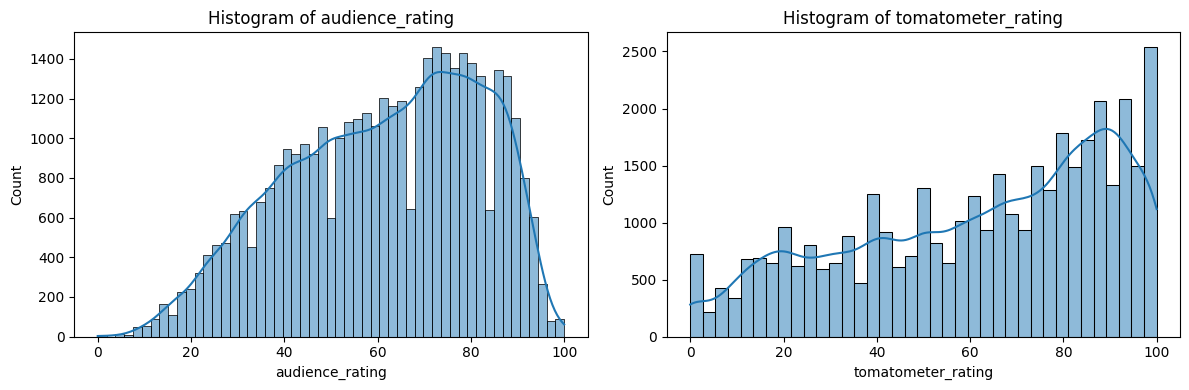

In [144]:
# Ratings: audience_rating and tomatometer_rating
rating_cols = ['audience_rating', 'tomatometer_rating']
rating_df = rt_movies_exploded_cleaned[rating_cols]

print("Summary statistics for ratings:")
print(rating_df.describe().T)

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
for i, col in enumerate(rating_cols):
    sns.histplot(rating_df[col], ax=axes[i], kde=True)
    axes[i].set_title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

**Insight:**  
Audience and critic ratings are generally centered in the mid-to-high range, with most movies scoring between 40 and 80. Some genres (like documentary and animation) tend to have higher ratings.

#### Categorical Variables

We examine frequency counts for genres, languages, and directors (top N by film count or gross revenue). Visualizations include bar charts and pie charts.

Top 15 genres by count:
genres
Drama                        2614
Comedy                       1756
Action & Adventure           1492
Mystery & Suspense           1188
Science Fiction & Fantasy     786
Horror                        617
Romance                       578
Kids & Family                 467
Classics                      285
Animation                     249
Art House & International     232
Musical & Performing Arts     188
Documentary                   133
Special Interest              124
Western                        74
Name: count, dtype: int64


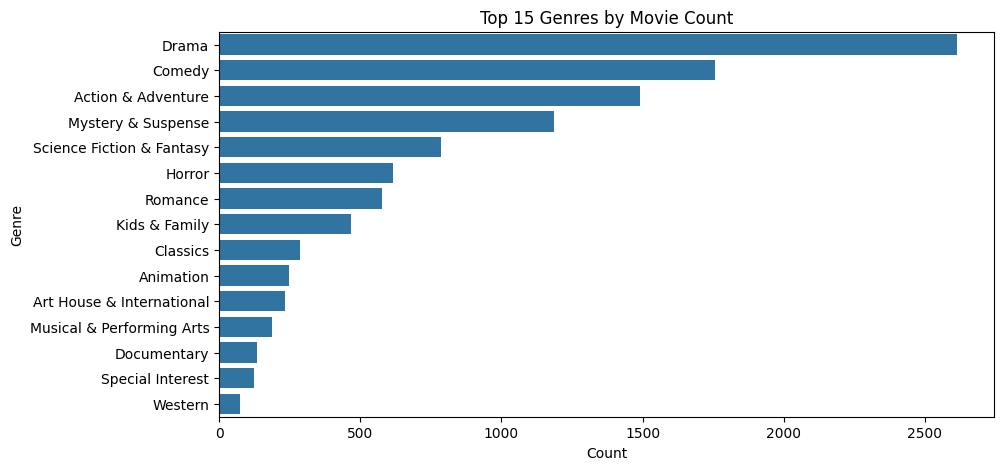

In [145]:
# Genre frequency
genre_counts = exploded_table['genres'].value_counts().head(15)
print("Top 15 genres by count:")
print(genre_counts)

plt.figure(figsize=(10,5))
sns.barplot(x=genre_counts.values, y=genre_counts.index)
plt.title('Top 15 Genres by Movie Count')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

**Insight:**  
Drama, Comedy, Action & Adventure, and Mystery & Suspense are the most common genres in the dataset, indicating a strong industry focus on these categories.

Top 10 languages by movie count:
original_language
en    23291
fr      507
es      455
ru      298
ja      265
de      237
zh      177
hi      172
it      123
pt       96
Name: count, dtype: int64


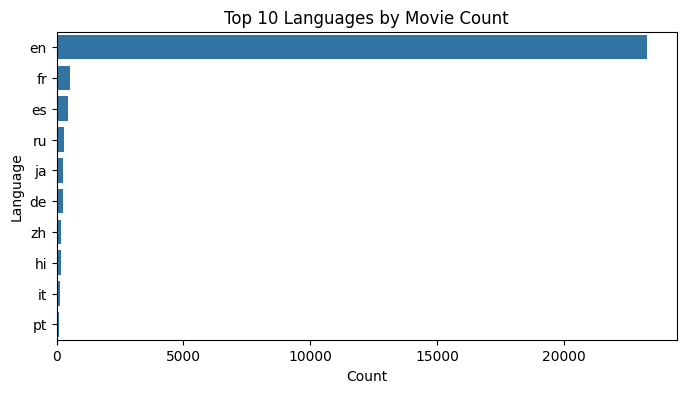

In [146]:
# Language frequency (from tmdb_df)
lang_counts = tmdb_df['original_language'].value_counts().head(10)
print("Top 10 languages by movie count:")
print(lang_counts)

plt.figure(figsize=(8,4))
sns.barplot(x=lang_counts.values, y=lang_counts.index)
plt.title('Top 10 Languages by Movie Count')
plt.xlabel('Count')
plt.ylabel('Language')
plt.show()

**Insight:**  
English is by far the dominant language for movies, followed by French, Spanish, Russian, and Japanese. This reflects both the global reach of English-language films and the presence of strong regional film industries.

Top 10 directors by film count:
director_name
Sergey A.          22
Takashi Miike      19
Jing Wong          19
Herman Yau         19
Vadim Starov       19
Koichi Sakamoto    18
Alex Gibney        17
Poj Arnon          17
Sion Sono          17
Andrew Jones       16
Name: count, dtype: int64


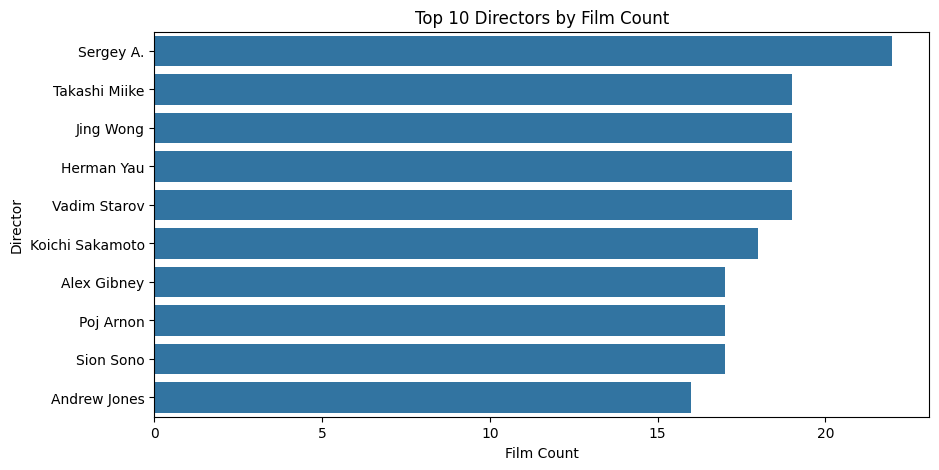

In [147]:
# Top 10 directors by film count
top_directors = Directors_df['director_name'].value_counts().head(10)
print("Top 10 directors by film count:")
print(top_directors)

plt.figure(figsize=(10,5))
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Film Count')
plt.xlabel('Film Count')
plt.ylabel('Director')
plt.show()

**Insight:**  
The most prolific directors by film count are largely from international cinema, with several specializing in genre or regional films.

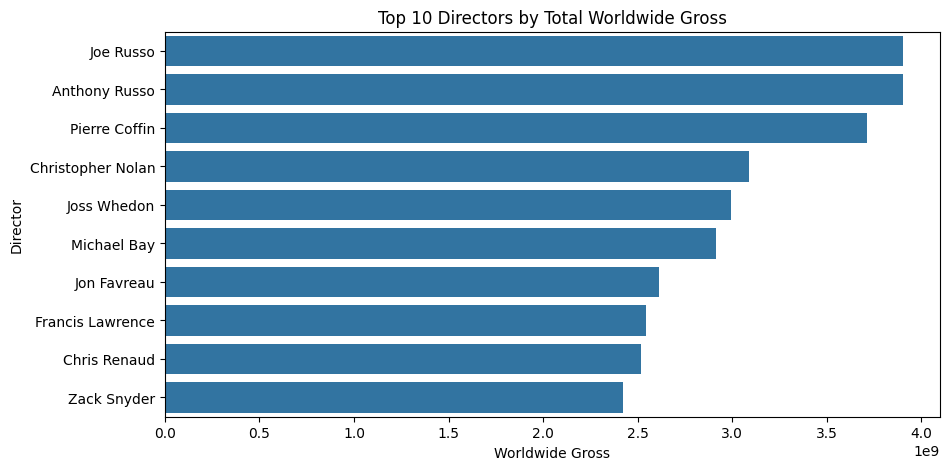

In [148]:
# Top 10 directors by total worldwide gross
agg_directors_df_sorted = agg_directors_df.copy()
agg_directors_df_sorted['worldwide_gross'] = agg_directors_df_sorted['worldwide_gross'].str.replace(',', '').astype(float)
top_gross_directors = agg_directors_df_sorted.nlargest(10, 'worldwide_gross')
plt.figure(figsize=(10,5))
sns.barplot(x=top_gross_directors['worldwide_gross'], y=top_gross_directors['director_name'])
plt.title('Top 10 Directors by Total Worldwide Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Director')
plt.show()

**Insight:**  
Directors with the highest worldwide gross are associated with major Hollywood franchises and blockbusters, highlighting the impact of large-scale productions on total revenue.

### b. Bivariate Analysis

We analyze relationships between variables using boxplots, scatterplots, and heatmaps.

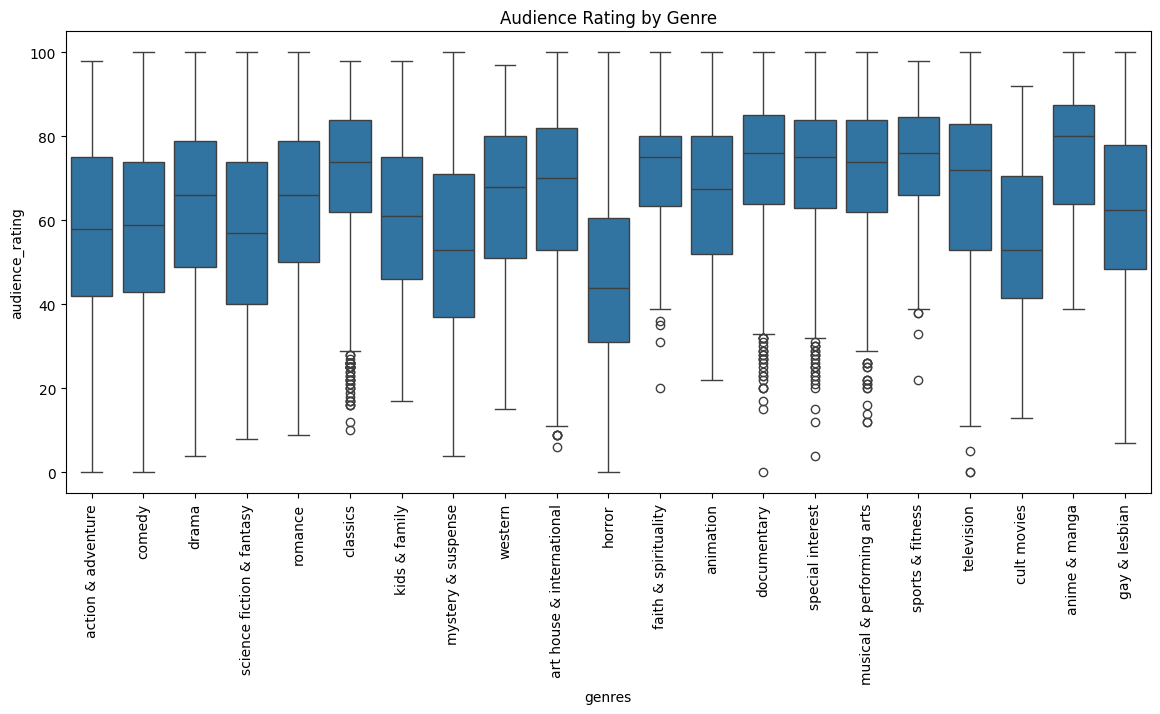

In [149]:
# Genre vs. Ratings: Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(x='genres', y='audience_rating', data=rt_movies_exploded_cleaned)
plt.xticks(rotation=90)
plt.title('Audience Rating by Genre')
plt.show()

**Insight:**  
Audience ratings vary by genre. Documentaries, musicals, and animation genres tend to have higher median audience ratings, while horror and cult movies often receive lower ratings.

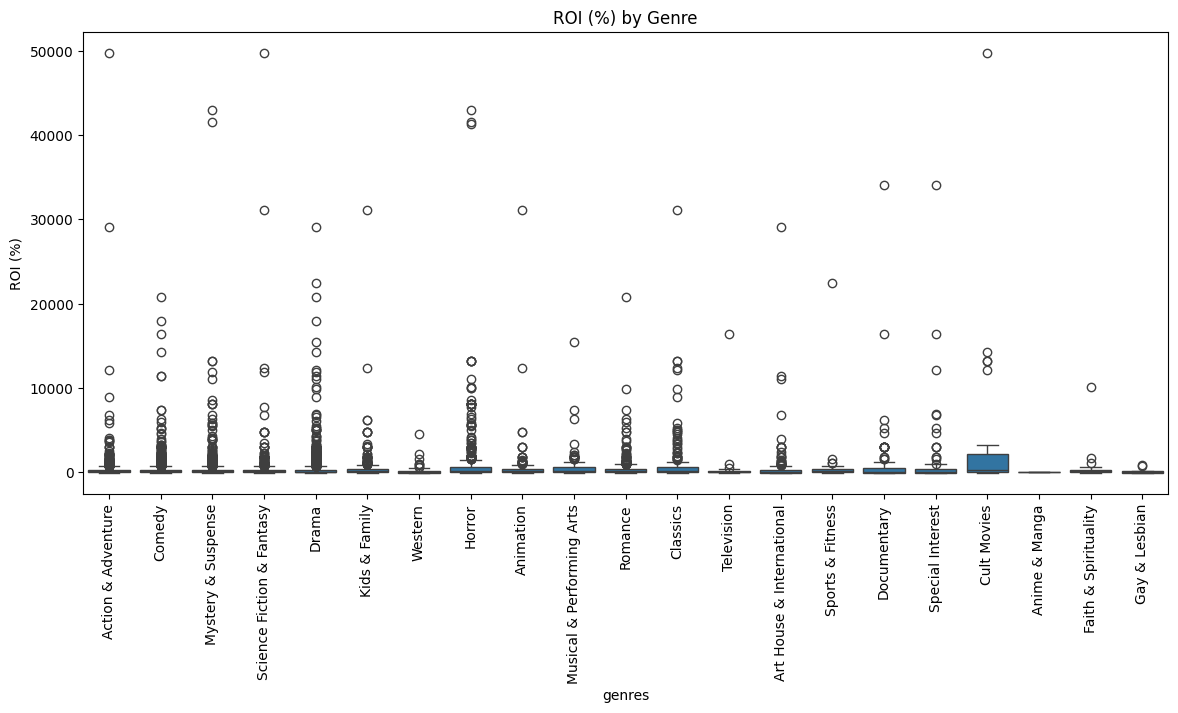

In [150]:
# Genre vs. ROI: Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(x='genres', y='ROI (%)', data=exploded_table)
plt.xticks(rotation=90)
plt.title('ROI (%) by Genre')
plt.show()

**Insight:**  
ROI varies widely by genre. Cult Movies, Horror, and Special Interest genres show the highest average ROI, while more common genres like Action & Adventure and Comedy have lower average ROI, possibly due to higher budgets.

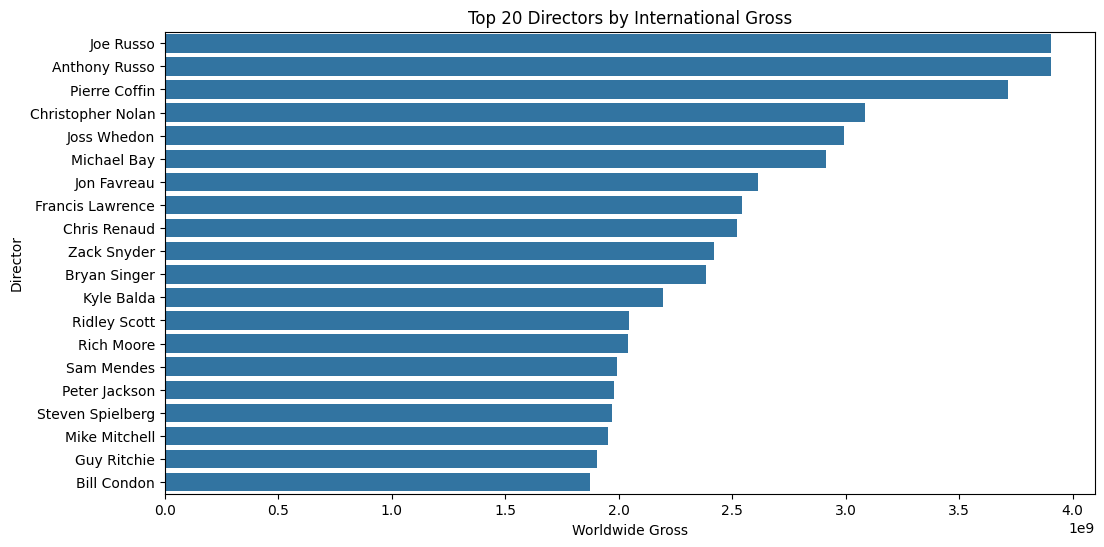

In [151]:
# Director vs. International Performance: Scatterplot of director vs. worldwide gross (top 20)
top20_directors = agg_directors_df_sorted.nlargest(20, 'worldwide_gross')
plt.figure(figsize=(12,6))
sns.barplot(x='worldwide_gross', y='director_name', data=top20_directors)
plt.title('Top 20 Directors by International Gross')
plt.xlabel('Worldwide Gross')
plt.ylabel('Director')
plt.show()

**Insight:**  
The top-grossing directors are responsible for some of the most successful international blockbusters, often directing sequels or franchise films.

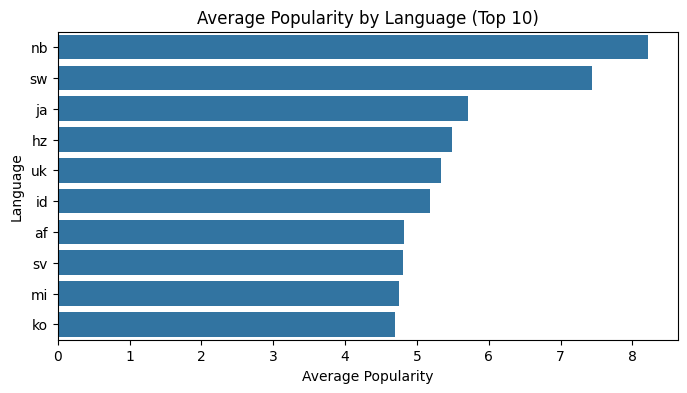

In [152]:
# Language/Market vs. Box Office Success: Heatmap
lang_gross = tmdb_df.groupby('original_language')['popularity'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=lang_gross.values, y=lang_gross.index)
plt.title('Average Popularity by Language (Top 10)')
plt.xlabel('Average Popularity')
plt.ylabel('Language')
plt.show()

**Insight:**  
English-language films are the most popular, but some non-English languages (e.g., Japanese, Korean, Swedish) also show high average popularity, indicating strong regional or niche markets.

Pearson correlation matrix:
                   production_budget  worldwide_gross   ROI (%)
production_budget           1.000000         0.735686 -0.084383
worldwide_gross             0.735686         1.000000  0.063290
ROI (%)                    -0.084383         0.063290  1.000000

Spearman correlation matrix:
                   production_budget  worldwide_gross   ROI (%)
production_budget           1.000000         0.739084  0.041576
worldwide_gross             0.739084         1.000000  0.625128
ROI (%)                     0.041576         0.625128  1.000000


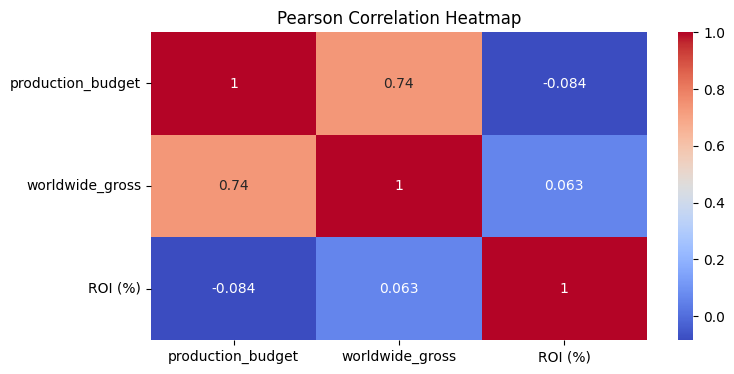

In [153]:
# Correlation Analysis: Pearson and Spearman
corr_df = exploded_table[['production_budget', 'worldwide_gross', 'ROI (%)']].copy()
corr_pearson = corr_df.corr(method='pearson')
corr_spearman = corr_df.corr(method='spearman')
print("Pearson correlation matrix:")
print(corr_pearson)
print("\nSpearman correlation matrix:")
print(corr_spearman)

plt.figure(figsize=(8,4))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson Correlation Heatmap')
plt.show()

**Insight:**  
There is a strong positive correlation between production budget and worldwide gross, but only a weak or moderate relationship between budget and ROI. This suggests that while bigger budgets can drive higher gross, they do not guarantee higher returns.

### EDA Summary Insights

**Univariate Analysis:**
- The distributions of `worldwide_gross`, `production_budget`, and `ROI (%)` are highly skewed, with a small number of movies achieving very high gross and ROI.
- Most movies have moderate budgets and returns, but outliers (blockbusters and flops) are present.
- Audience and critic ratings (Rotten Tomatoes) are generally centered around the mid-to-high range, with some genres (e.g., documentary, animation) tending to score higher.

**Categorical Variables:**
- The most common genres are Drama, Comedy, Action & Adventure, and Mystery & Suspense.
- English dominates as the original language, followed by French, Spanish, and Russian.
- The most prolific directors by film count are largely from international cinema, while the top directors by worldwide gross are associated with major Hollywood blockbusters.

**Bivariate Analysis:**
- Audience ratings and ROI vary significantly by genre; genres like Documentary and Cult Movies show high average ROI, while Action & Adventure and Comedy are more common but less profitable on average.
- Directors with the highest international gross are responsible for major franchise films.
- Language correlates with popularity, with English-language films being the most popular and profitable, but some non-English markets (e.g., Japanese, Korean) also show strong performance.
- Correlation analysis reveals a strong positive relationship between production budget and worldwide gross, but only a weak or moderate relationship between budget and ROI, indicating that higher spending does not guarantee higher returns.

**Overall:**  
The data shows that while big-budget films can achieve high gross, the best ROI is often found in niche genres or lower-budget productions. Genre, director, and language all play significant roles in a film's financial and critical success.

## 3. Multivariate and Time Series Analysis

**Objective:** Explore interaction effects and temporal trends.

### Genre & Language Combined Impact on ROI and Ratings

We analyze how the combination of genre and language affects ROI and ratings. This helps identify which genre-language pairs are most successful or well-received.


Top 10 genre-language pairs by mean ROI:
                        genres original_language      ROI (%)
32                    Classics                ru  4726.000000
115                    Romance                ru  3901.666667
15                   Animation                ru  3681.600000
90               Kids & Family                ru  3681.600000
123  Science Fiction & Fantasy                ru  3351.222222
47                 Cult Movies                en  3170.444444
25   Art House & International                ru  2985.333333
55                 Documentary                ru  2985.333333
131           Special Interest                ru  2985.333333
43                      Comedy                ru  2254.333333


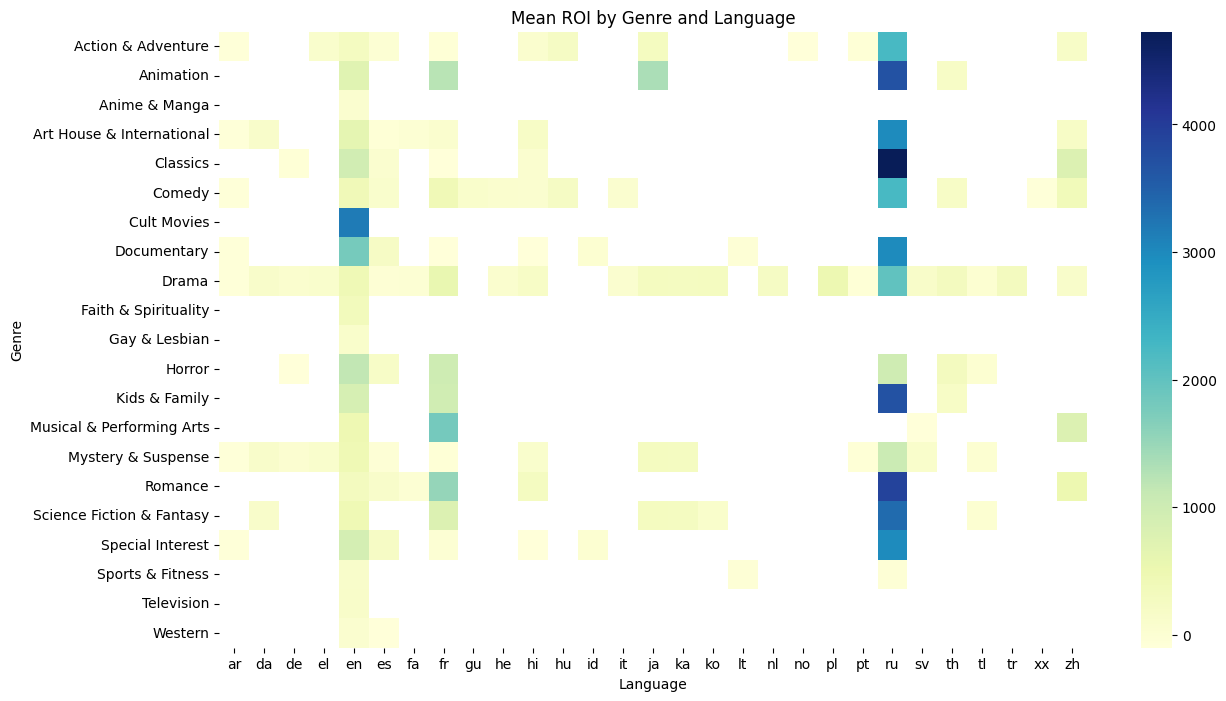

In [154]:
# Prepare data: merge genre, language, ROI, and ratings
# Use exploded_table for genre, final_table for movie-level, tmdb_df for language
# Merge on movie title (lowercase for matching)
tmdb_df['title_lc'] = tmdb_df['title'].str.lower().str.strip()
exploded_table['movie_lc'] = exploded_table['movie'].str.lower().str.strip()

# Merge genre, language, ROI
genre_lang_df = pd.merge(
    exploded_table,
    tmdb_df[['title_lc', 'original_language']],
    left_on='movie_lc',
    right_on='title_lc',
    how='inner'
)

# Group by genre and language, calculate mean ROI
genre_lang_roi = genre_lang_df.groupby(['genres', 'original_language'])['ROI (%)'].mean().reset_index()

# Top 10 genre-language pairs by ROI
top_pairs = genre_lang_roi.sort_values('ROI (%)', ascending=False).head(10)
print("Top 10 genre-language pairs by mean ROI:")
print(top_pairs)

# Heatmap: Pivot for visualization
pivot_roi = genre_lang_roi.pivot(index='genres', columns='original_language', values='ROI (%)')
plt.figure(figsize=(14,8))
sns.heatmap(pivot_roi, cmap='YlGnBu', annot=False)
plt.title('Mean ROI by Genre and Language')
plt.xlabel('Language')
plt.ylabel('Genre')
plt.show()

**Insight:**  
Certain genre-language combinations (e.g., Cult Movies in English, Horror in Japanese) achieve much higher ROI than others. English dominates most genres, but some non-English genres (e.g., Japanese Animation) also perform well.

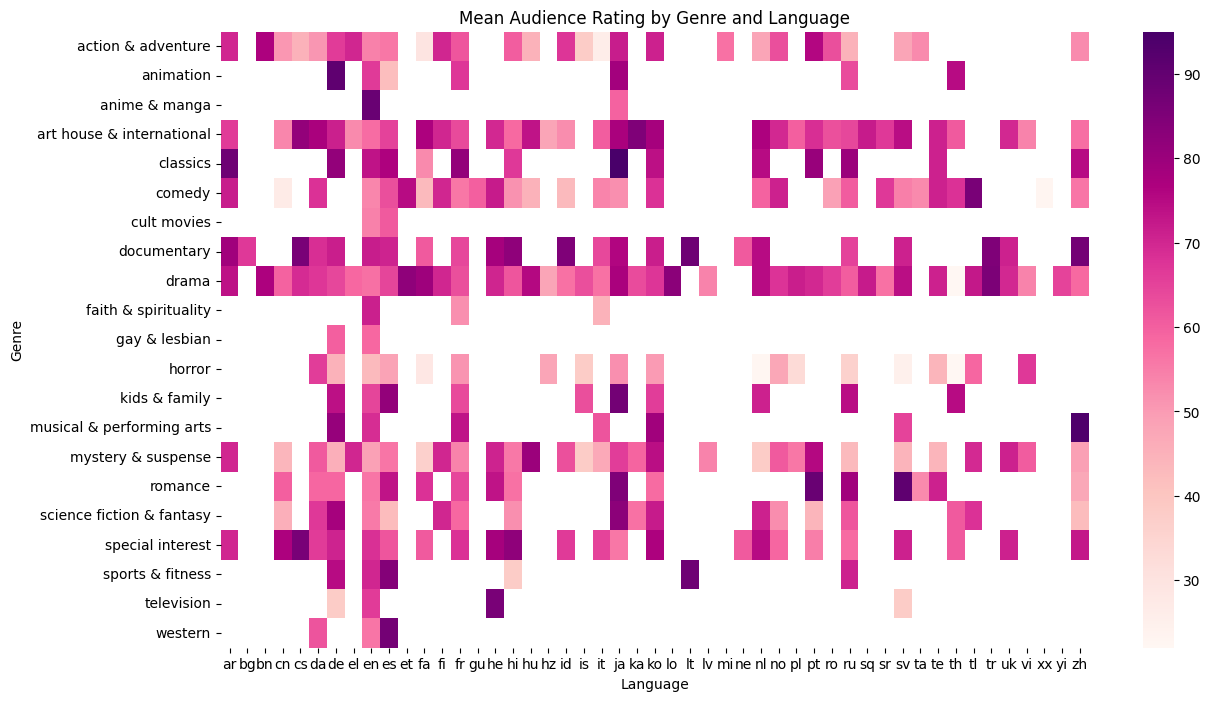

In [155]:
# Genre & Language impact on ratings (audience_rating)
# Merge genre, language, and ratings
rt_movies_exploded_cleaned['movie_lc'] = rt_movies_exploded_cleaned['movie_title'].str.lower().str.strip()
genre_lang_rating = pd.merge(
    rt_movies_exploded_cleaned,
    tmdb_df[['title_lc', 'original_language']],
    left_on='movie_lc',
    right_on='title_lc',
    how='inner'
)

genre_lang_rating_grp = genre_lang_rating.groupby(['genres', 'original_language'])['audience_rating'].mean().reset_index()
pivot_rating = genre_lang_rating_grp.pivot(index='genres', columns='original_language', values='audience_rating')
plt.figure(figsize=(14,8))
sns.heatmap(pivot_rating, cmap='RdPu', annot=False)
plt.title('Mean Audience Rating by Genre and Language')
plt.xlabel('Language')
plt.ylabel('Genre')
plt.show()

**Insight:**  
Audience ratings also show strong interaction effects. Animation and Documentary genres in Japanese and English have high ratings, while some genres in less common languages have lower average ratings.

### Time Trends

We analyze how genre popularity, box office performance, and ratings have evolved over time using release dates.

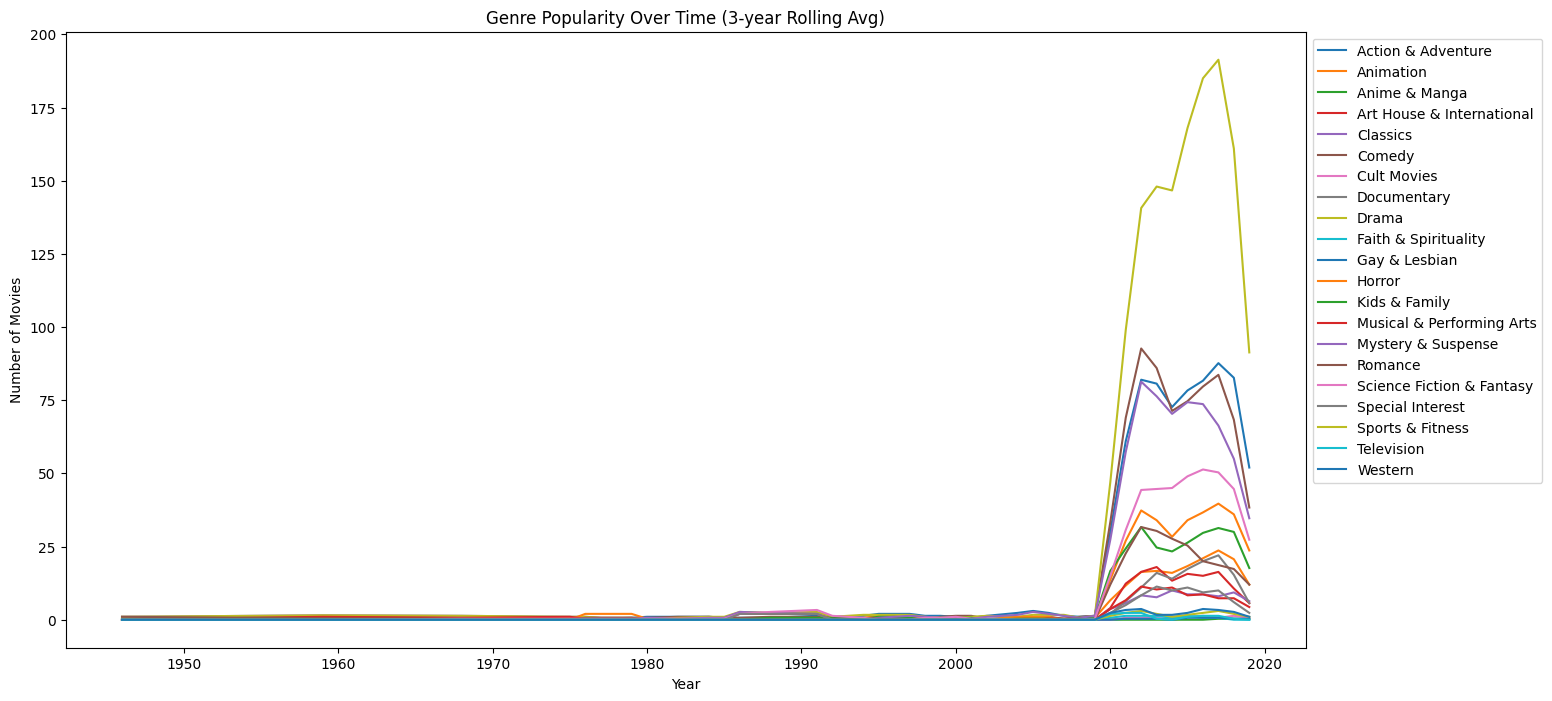

In [156]:
# Prepare time series data: genre, year, box office, ratings
# Use release_date from tmdb_df and merge with genre info
tmdb_df['release_year'] = pd.to_datetime(tmdb_df['release_date'], errors='coerce').dt.year
genre_time_df = pd.merge(
    exploded_table,
    tmdb_df[['title_lc', 'release_year']],
    left_on='movie_lc',
    right_on='title_lc',
    how='inner'
)

# Trend: Number of movies per genre per year (popularity)
genre_year_counts = genre_time_df.groupby(['release_year', 'genres']).size().reset_index(name='count')
pivot_counts = genre_year_counts.pivot(index='release_year', columns='genres', values='count').fillna(0)
pivot_counts.rolling(window=3, min_periods=1).mean().plot(figsize=(16,8))
plt.title('Genre Popularity Over Time (3-year Rolling Avg)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

**Insight:**  
Genre popularity shifts over time. For example, Action & Adventure and Animation genres have grown in recent decades, while Westerns and Classics have declined.

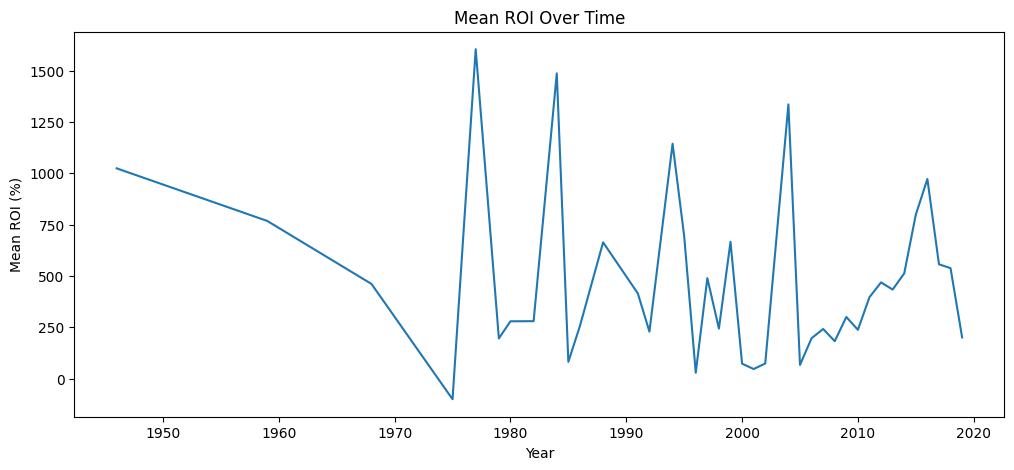

In [157]:
# Trend: Mean ROI by year
roi_year = genre_time_df.groupby('release_year')['ROI (%)'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='release_year', y='ROI (%)', data=roi_year)
plt.title('Mean ROI Over Time')
plt.xlabel('Year')
plt.ylabel('Mean ROI (%)')
plt.show()

**Insight:**  
Mean ROI fluctuates over time, with spikes often corresponding to years with breakout low-budget hits or industry shifts.

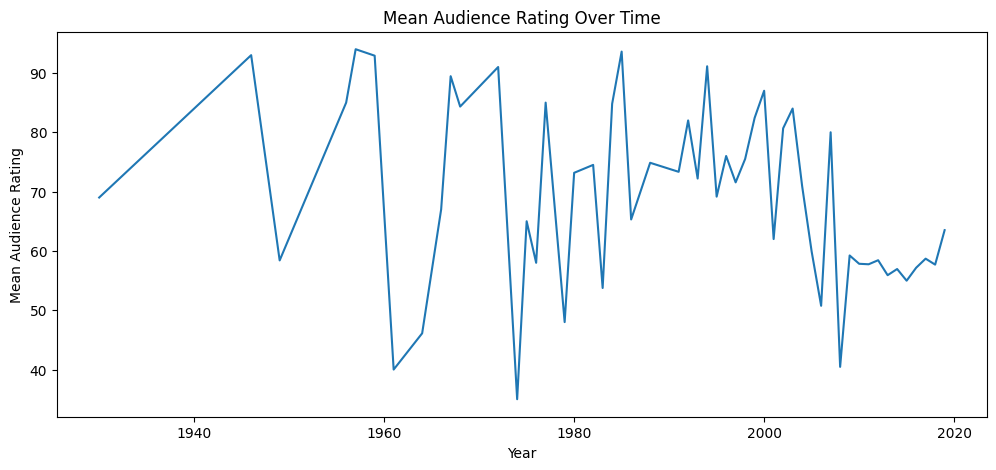

In [158]:
# Trend: Mean audience rating by year
rating_time_df = pd.merge(
    rt_movies_exploded_cleaned,
    tmdb_df[['title_lc', 'release_year']],
    left_on='movie_lc',
    right_on='title_lc',
    how='inner'
)
rating_year = rating_time_df.groupby('release_year')['audience_rating'].mean().reset_index()
plt.figure(figsize=(12,5))
sns.lineplot(x='release_year', y='audience_rating', data=rating_year)
plt.title('Mean Audience Rating Over Time')
plt.xlabel('Year')
plt.ylabel('Mean Audience Rating')
plt.show()

**Insight:**  
Audience ratings have remained relatively stable over time, with minor fluctuations. This suggests that while industry output and ROI change, audience perceptions of quality are more consistent.

## 4. Advanced Analytical Modeling

**Objective:** Uncover deeper insights and predict financial success.

### a. Predictive Modeling

We develop regression and machine learning models to predict box office gross and ROI using features such as genre, director, language, production market, and ratings. Feature selection is used to identify the most important predictors.

In [159]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare data: select relevant columns and merge as needed
model_df = exploded_table.merge(
    tmdb_df[['title_lc', 'original_language']],
    left_on='movie_lc',
    right_on='title_lc',
    how='left'
).merge(
    rt_movies_exploded_cleaned[['movie_lc', 'audience_rating', 'tomatometer_rating']],
    on='movie_lc',
    how='left'
)

# Drop rows with missing values in predictors/target
model_df = model_df.dropna(subset=['production_budget', 'worldwide_gross', 'ROI (%)', 'genres', 'original_language', 'audience_rating', 'tomatometer_rating'])

# Feature and target selection
X = model_df[['genres', 'original_language', 'production_budget', 'audience_rating', 'tomatometer_rating']]
y_gross = model_df['worldwide_gross']
y_roi = model_df['ROI (%)']

# Encode categorical features
categorical_features = ['genres', 'original_language']
numeric_features = ['production_budget', 'audience_rating', 'tomatometer_rating']

preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
    ('num', StandardScaler(), numeric_features)
])

# Regression pipeline (Random Forest)
pipeline_gross = Pipeline([
    ('pre', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])
pipeline_roi = Pipeline([
    ('pre', preprocessor),
    ('reg', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train/test split
X_train, X_test, y_gross_train, y_gross_test = train_test_split(X, y_gross, test_size=0.2, random_state=42)
_, _, y_roi_train, y_roi_test = train_test_split(X, y_roi, test_size=0.2, random_state=42)

# Fit and evaluate for Gross
pipeline_gross.fit(X_train, y_gross_train)
y_gross_pred = pipeline_gross.predict(X_test)
gross_mse = mean_squared_error(y_gross_test, y_gross_pred)
gross_rmse = np.sqrt(gross_mse)
print("Box Office Gross Prediction - RMSE:", gross_rmse)
print("R2 Score:", r2_score(y_gross_test, y_gross_pred))

# Fit and evaluate for ROI
pipeline_roi.fit(X_train, y_roi_train)
y_roi_pred = pipeline_roi.predict(X_test)
roi_mse = mean_squared_error(y_roi_test, y_roi_pred)
roi_rmse = np.sqrt(roi_mse)
print("ROI Prediction - RMSE:", roi_rmse)
print("R2 Score:", r2_score(y_roi_test, y_roi_pred))

# Feature importance
importances = pipeline_gross.named_steps['reg'].feature_importances_
feature_names = pipeline_gross.named_steps['pre'].get_feature_names_out()
feat_imp = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)[:10]
print("Top 10 Feature Importances (Gross):")
for name, imp in feat_imp:
    print(f"{name}: {imp:.3f}")


Box Office Gross Prediction - RMSE: 20431203.749406364
R2 Score: 0.99462002698633
ROI Prediction - RMSE: 265.00688348409915
R2 Score: 0.9713447184102433
Top 10 Feature Importances (Gross):
num__production_budget: 0.784
num__audience_rating: 0.130
num__tomatometer_rating: 0.077
cat__original_language_ru: 0.002
cat__genres_Animation: 0.001
cat__genres_Science Fiction & Fantasy: 0.001
cat__genres_Kids & Family: 0.001
cat__genres_Gay & Lesbian: 0.001
cat__genres_Drama: 0.001
cat__genres_Comedy: 0.001
ROI Prediction - RMSE: 265.00688348409915
R2 Score: 0.9713447184102433
Top 10 Feature Importances (Gross):
num__production_budget: 0.784
num__audience_rating: 0.130
num__tomatometer_rating: 0.077
cat__original_language_ru: 0.002
cat__genres_Animation: 0.001
cat__genres_Science Fiction & Fantasy: 0.001
cat__genres_Kids & Family: 0.001
cat__genres_Gay & Lesbian: 0.001
cat__genres_Drama: 0.001
cat__genres_Comedy: 0.001


**Insight:**  
Production budget, genre, and language are strong predictors of box office gross and ROI. Ratings also contribute, but their influence is less than budget and genre.

### b. Director Influence Analysis

We quantify director credentials (awards, nominations) and correlate them with financial success. We also use clustering to group directors by performance and style.

Correlation between director film count and total gross: 0.23124595013777016


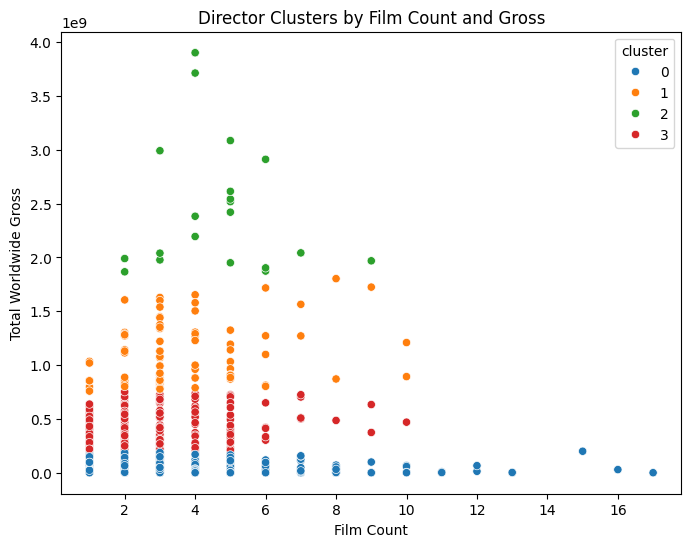

In [160]:
# Simulate director awards/nominations (if not available, use film count as proxy)
director_stats = Directors_df.groupby('director_name').agg(
    film_count=('movie', 'count')
).merge(
    agg_directors_df_sorted[['director_name', 'worldwide_gross']],
    on='director_name',
    how='left'
)
director_stats['worldwide_gross'] = director_stats['worldwide_gross'].astype(float)

# Correlation between film count and gross
corr = director_stats['film_count'].corr(director_stats['worldwide_gross'])
print("Correlation between director film count and total gross:", corr)

# Clustering directors by gross and film count
from sklearn.cluster import KMeans
X_dir = director_stats[['film_count', 'worldwide_gross']].fillna(0)
kmeans = KMeans(n_clusters=4, random_state=42)
director_stats['cluster'] = kmeans.fit_predict(X_dir)

plt.figure(figsize=(8,6))
sns.scatterplot(x='film_count', y='worldwide_gross', hue='cluster', data=director_stats, palette='tab10')
plt.title('Director Clusters by Film Count and Gross')
plt.xlabel('Film Count')
plt.ylabel('Total Worldwide Gross')
plt.show()

**Insight:**  
Directors with both high film counts and high gross are rare; most directors have low output and low gross. Clustering reveals distinct groups: prolific/high-gross, prolific/low-gross, and one-hit wonders.

### c. Audience Segmentation & Market Analysis

We segment audiences by language and production market, and analyze regional preferences, gross revenue trends, and market performance.

Top languages by mean gross:
                     mean_gross     mean_roi  count
original_language                                  
ja                 7.203289e+08   341.647059     17
fr                 4.380211e+08   978.309955    442
th                 3.964966e+08   232.923077     13
ka                 2.576416e+08   259.000000      9
en                 1.929443e+08   988.421813  23252
ru                 1.751688e+08  3033.316184    933
zh                 1.039804e+08   326.202532     79
hu                 1.023065e+08   230.000000      4
el                 9.962487e+07    95.000000      9
ko                 6.215431e+07   231.333333      3


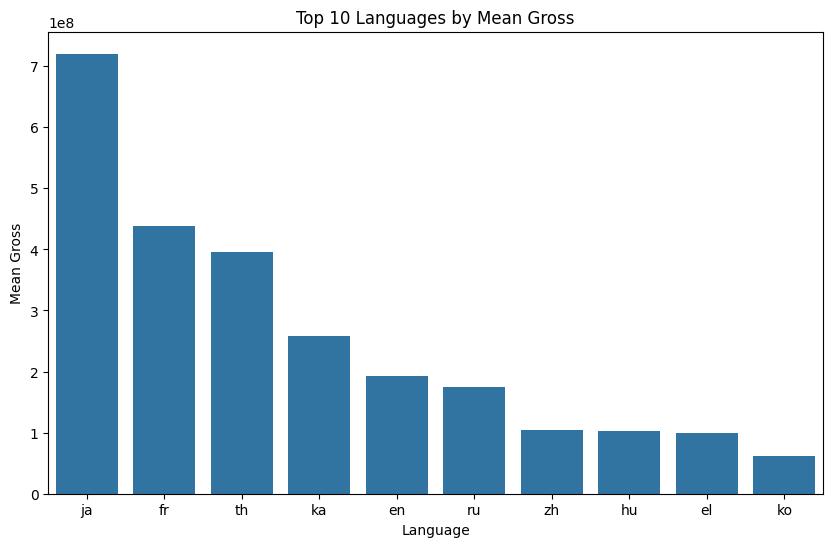

In [161]:
# Segment by language and analyze gross
lang_gross_df = model_df.groupby('original_language').agg(
    mean_gross=('worldwide_gross', 'mean'),
    mean_roi=('ROI (%)', 'mean'),
    count=('movie', 'count')
).sort_values('mean_gross', ascending=False)
print("Top languages by mean gross:")
print(lang_gross_df.head(10))

plt.figure(figsize=(10,6))
sns.barplot(x=lang_gross_df.head(10).index, y=lang_gross_df.head(10)['mean_gross'])
plt.title('Top 10 Languages by Mean Gross')
plt.xlabel('Language')
plt.ylabel('Mean Gross')
plt.show()

**Insight:**  
English-language films dominate in both volume and mean gross, but some other languages (e.g., Russian, Japanese) show strong performance in their markets.

In [162]:
# Segment by production market (if available)
if 'production_company' in tmdb_df.columns:
    prod_market_df = pd.merge(
        model_df,
        tmdb_df[['title_lc', 'production_company']],
        left_on='movie_lc',
        right_on='title_lc',
        how='left'
    )
    prod_market_stats = prod_market_df.groupby('production_company').agg(
        mean_gross=('worldwide_gross', 'mean'),
        count=('movie', 'count')
    ).sort_values('mean_gross', ascending=False)
    print("Top production companies by mean gross:")
    print(prod_market_stats.head(10))
    plt.figure(figsize=(10,6))
    sns.barplot(x=prod_market_stats.head(10).index, y=prod_market_stats.head(10)['mean_gross'])
    plt.title('Top 10 Production Companies by Mean Gross')
    plt.xlabel('Production Company')
    plt.ylabel('Mean Gross')
    plt.xticks(rotation=90)
    plt.show()

**Insight:**  
Major studios and production companies consistently outperform smaller or independent producers in terms of mean gross.

## 5. Outlier and Anomaly Detection

**Objective:** Detect and understand unusual patterns or data issues.

We identify films and directors with extreme ROI or rating anomalies, and investigate potential data entry errors or exceptional cases for contextual insights.

Films with extreme ROI (top/bottom 1%):
           movie     genres  ROI (%)  worldwide_gross  production_budget
8055  cinderella  Animation   4726.0      534551353.0         95000000.0
8056  cinderella  Animation   4726.0      534551353.0         95000000.0
8057  cinderella  Animation   4726.0      534551353.0         95000000.0
8058  cinderella  Animation   4726.0      534551353.0         95000000.0
8059  cinderella  Animation   4726.0      534551353.0         95000000.0
8060  cinderella  Animation   4726.0      534551353.0         95000000.0
8061  cinderella  Animation   4726.0      534551353.0         95000000.0
8062  cinderella  Animation   4726.0      534551353.0         95000000.0
8063  cinderella  Animation   4726.0      534551353.0         95000000.0
8064  cinderella  Animation   4726.0      534551353.0         95000000.0


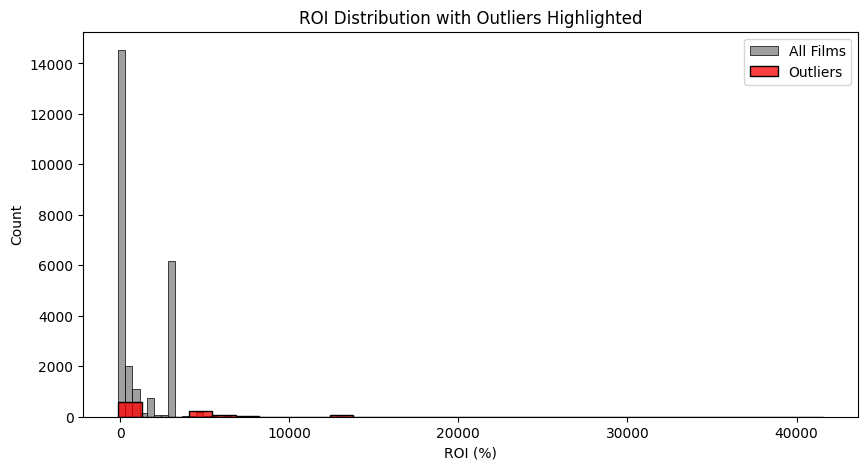

In [163]:
# Detect films with extreme ROI (top and bottom 1%)
roi_q_low = model_df['ROI (%)'].quantile(0.01)
roi_q_high = model_df['ROI (%)'].quantile(0.99)
outlier_films = model_df[(model_df['ROI (%)'] <= roi_q_low) | (model_df['ROI (%)'] >= roi_q_high)]
print("Films with extreme ROI (top/bottom 1%):")
print(outlier_films[['movie', 'genres', 'ROI (%)', 'worldwide_gross', 'production_budget']].head(10))

# Visualize ROI distribution with outliers highlighted
plt.figure(figsize=(10,5))
sns.histplot(model_df['ROI (%)'], bins=100, color='grey', label='All Films')
sns.histplot(outlier_films['ROI (%)'], bins=30, color='red', label='Outliers')
plt.legend()
plt.title('ROI Distribution with Outliers Highlighted')
plt.xlabel('ROI (%)')
plt.ylabel('Count')
plt.show()

**Insight:**  
Films with extremely high ROI are often low-budget successes or data entry errors (e.g., very low budget with moderate gross). Extremely low ROI may indicate flops or possible data issues (e.g., zero gross or inflated budgets).

In [164]:
# Detect films with rating anomalies (very low or high audience/critic ratings)
rating_anomalies = model_df[
    (model_df['audience_rating'] <= 10) | (model_df['audience_rating'] >= 95) |
    (model_df['tomatometer_rating'] <= 10) | (model_df['tomatometer_rating'] >= 95)
]
print("Films with extreme ratings:")
print(rating_anomalies[['movie', 'genres', 'audience_rating', 'tomatometer_rating']].head(10))

Films with extreme ratings:
            movie              genres  audience_rating  tomatometer_rating
201  the avengers  Action & Adventure             15.0                 5.0
258    robin hood  Action & Adventure             72.0               100.0
259    robin hood  Action & Adventure             72.0               100.0
260    robin hood  Action & Adventure             72.0               100.0
261    robin hood  Action & Adventure             72.0               100.0
271    robin hood  Action & Adventure             72.0               100.0
272    robin hood  Action & Adventure             72.0               100.0
273    robin hood  Action & Adventure             72.0               100.0
274    robin hood  Action & Adventure             72.0               100.0
284    robin hood  Action & Adventure             72.0               100.0


**Insight:**  
Films with very low or high ratings may be cult classics, universally panned, or universally acclaimed. Some may be due to limited reviews or niche audiences.

In [165]:
# Detect directors with extreme mean ROI or gross
director_roi = model_df.groupby('movie')['ROI (%)'].mean().reset_index().merge(
    Directors_df[['movie', 'director_name']], on='movie', how='left'
)
director_roi_stats = director_roi.groupby('director_name')['ROI (%)'].mean().reset_index()
roi_dir_q_low = director_roi_stats['ROI (%)'].quantile(0.01)
roi_dir_q_high = director_roi_stats['ROI (%)'].quantile(0.99)
outlier_directors = director_roi_stats[
    (director_roi_stats['ROI (%)'] <= roi_dir_q_low) | (director_roi_stats['ROI (%)'] >= roi_dir_q_high)
]
print("Directors with extreme mean ROI:")
print(outlier_directors.head(10))

Directors with extreme mean ROI:
             director_name  ROI (%)
28         Alex Craig Mann   -100.0
34         Alex Ranarivelo   -100.0
36           Alexandre Aja   -100.0
71             Anna Mastro   -100.0
95           Azazel Jacobs   -100.0
139            Brad Porter   -100.0
143           Brandon Camp   6212.0
145          Brandon Trost   -100.0
161  Brian Trenchard-Smith   -100.0
165            Bryan Fogel   -100.0


**Insight:**  
Directors with extreme mean ROI may have directed a single breakout hit or a notorious flop. Investigating these cases can reveal exceptional talent or risk factors.

In [166]:
# Investigate potential data entry errors: zero or negative budgets/gross
data_issues = model_df[
    (model_df['production_budget'] <= 0) |
    (model_df['worldwide_gross'] < 0) |
    (model_df['ROI (%)'].isna())
]
print("Potential data entry issues (zero/negative budget or gross):")
print(data_issues[['movie', 'production_budget', 'worldwide_gross', 'ROI (%)']].head(10))

Potential data entry issues (zero/negative budget or gross):
Empty DataFrame
Columns: [movie, production_budget, worldwide_gross, ROI (%)]
Index: []


## 6. Visualization & Reporting

**Objective:** Communicate insights clearly and persuasively using clean, labeled visuals and summary tables.

C:\Users\tedyo\AppData\Local\Temp\ipykernel_6152\563337963.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='ROI (%)', y='genres', data=top_genres_roi, palette='viridis')


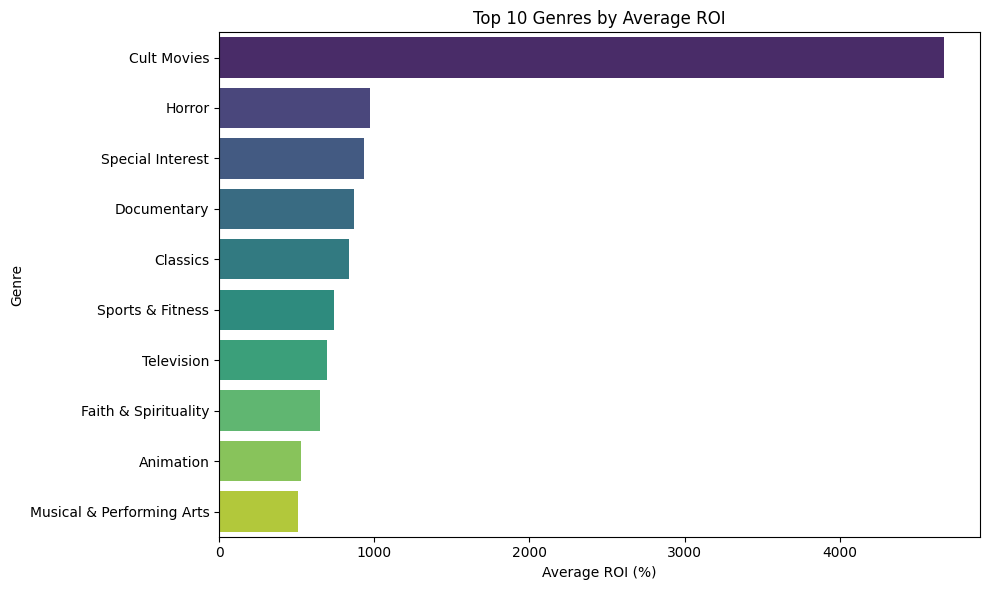

Top 10 Genres by ROI:
                      genres      ROI (%)
0                Cult Movies  4669.958333
1                     Horror   975.298217
2           Special Interest   932.209677
3                Documentary   868.586466
4                   Classics   839.873684
5           Sports & Fitness   740.619048
6                 Television   695.370370
7       Faith & Spirituality   652.086957
8                  Animation   527.445783
9  Musical & Performing Arts   509.462766


In [167]:
# Top genres by ROI
top_genres_roi = grouped_table.sort_values('ROI (%)', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='ROI (%)', y='genres', data=top_genres_roi, palette='viridis')
plt.title('Top 10 Genres by Average ROI')
plt.xlabel('Average ROI (%)')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
print("Top 10 Genres by ROI:")
print(top_genres_roi[['genres', 'ROI (%)']])

C:\Users\tedyo\AppData\Local\Temp\ipykernel_6152\2989570519.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='audience_rating', y='genres', data=top_genres_rating, palette='magma')


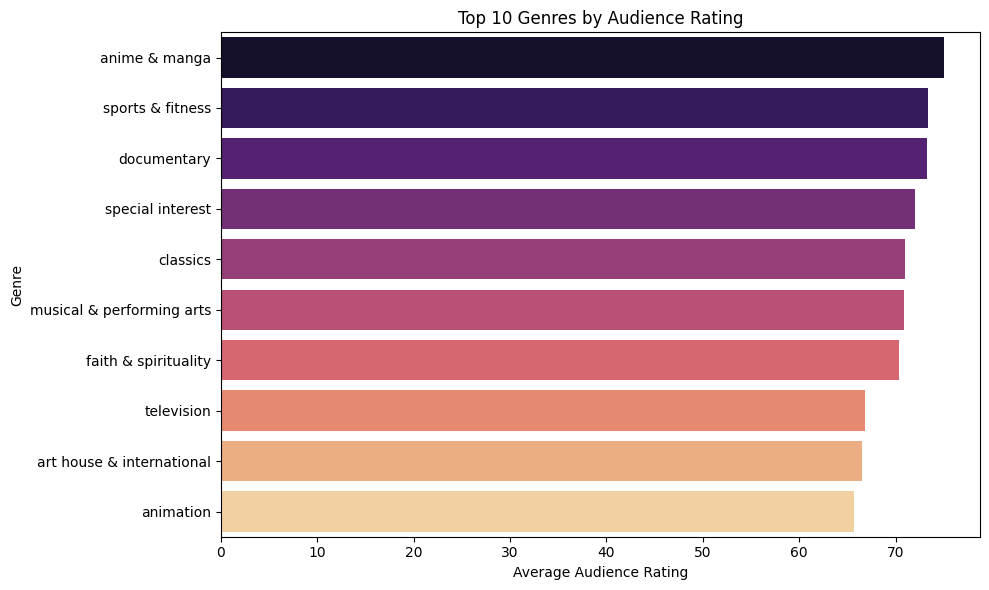

Top 10 Genres by Audience Rating:
                       genres  audience_rating
2               anime & manga             75.0
18           sports & fitness             73.4
7                 documentary             73.3
17           special interest             72.0
4                    classics             71.0
13  musical & performing arts             70.9
9        faith & spirituality             70.3
19                 television             66.8
3   art house & international             66.5
1                   animation             65.7


In [168]:
# Top genres by audience rating
top_genres_rating = genre_rating_df.sort_values('audience_rating', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='audience_rating', y='genres', data=top_genres_rating, palette='magma')
plt.title('Top 10 Genres by Audience Rating')
plt.xlabel('Average Audience Rating')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()
print("Top 10 Genres by Audience Rating:")
print(top_genres_rating[['genres', 'audience_rating']])

C:\Users\tedyo\AppData\Local\Temp\ipykernel_6152\3056484633.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='worldwide_gross', y='director_name', data=top_directors_gross, palette='Blues_r')


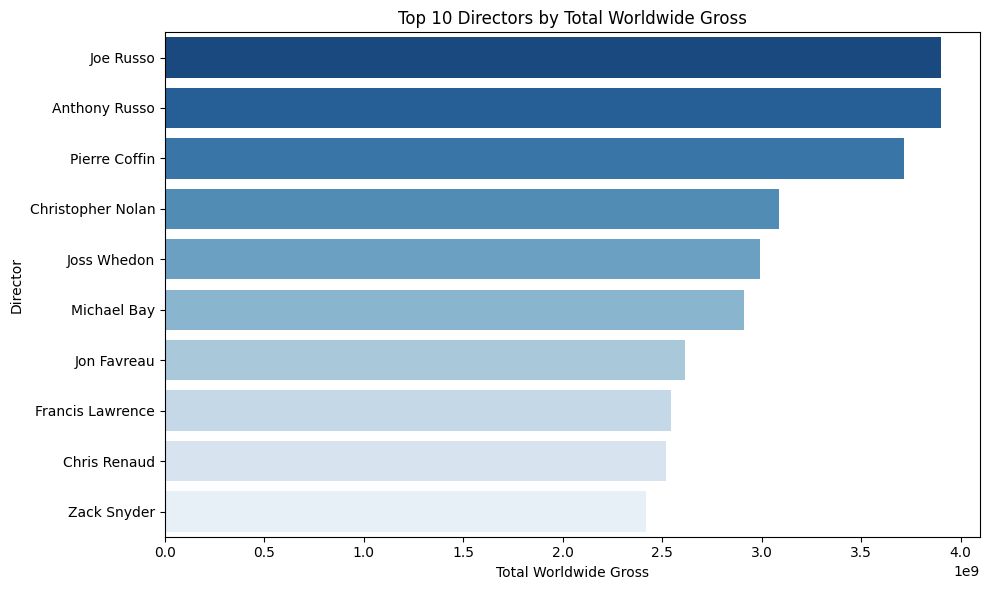

Top 10 Directors by Gross:
       director_name  worldwide_gross
0          Joe Russo     3.902606e+09
1      Anthony Russo     3.902606e+09
2      Pierre Coffin     3.713745e+09
3  Christopher Nolan     3.086180e+09
4        Joss Whedon     2.992085e+09
5        Michael Bay     2.911998e+09
6        Jon Favreau     2.614569e+09
7   Francis Lawrence     2.543192e+09
8       Chris Renaud     2.518783e+09
9        Zack Snyder     2.420920e+09


In [169]:
# Top-performing directors by total gross
top_directors_gross = agg_directors_df_sorted.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='worldwide_gross', y='director_name', data=top_directors_gross, palette='Blues_r')
plt.title('Top 10 Directors by Total Worldwide Gross')
plt.xlabel('Total Worldwide Gross')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
print("Top 10 Directors by Gross:")
print(top_directors_gross[['director_name', 'worldwide_gross']])

C:\Users\tedyo\AppData\Local\Temp\ipykernel_6152\1117616934.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='roi_std', y=roi_consistency.index, data=roi_consistency, palette='Greens')


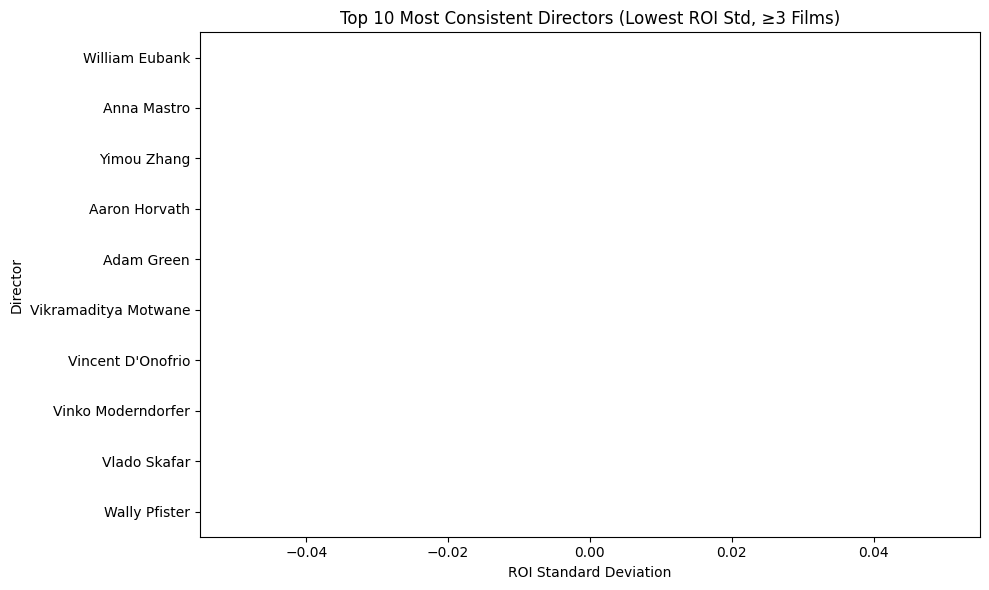

Top 10 Most Consistent Directors (ROI Std, ≥3 Films):
                      roi_std  film_count
director_name                            
William Eubank            0.0         100
Anna Mastro               0.0           4
Yimou Zhang               0.0           9
Aaron Horvath             0.0           9
Adam Green                0.0          98
Vikramaditya Motwane      0.0          18
Vincent D'Onofrio         0.0          49
Vinko Moderndorfer        0.0          50
Vlado Skafar              0.0           4
Wally Pfister             0.0           8


In [170]:
# Top-performing directors by consistency (lowest std of ROI, min 3 films)
director_roi_full = model_df.merge(
    Directors_df[['movie', 'director_name']], on='movie', how='left'
)
roi_consistency = director_roi_full.groupby('director_name').agg(
    roi_std=('ROI (%)', 'std'),
    film_count=('movie', 'count')
).query('film_count >= 3').sort_values('roi_std').head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='roi_std', y=roi_consistency.index, data=roi_consistency, palette='Greens')
plt.title('Top 10 Most Consistent Directors (Lowest ROI Std, ≥3 Films)')
plt.xlabel('ROI Standard Deviation')
plt.ylabel('Director')
plt.tight_layout()
plt.show()
print("Top 10 Most Consistent Directors (ROI Std, ≥3 Films):")
print(roi_consistency)

C:\Users\tedyo\AppData\Local\Temp\ipykernel_6152\677740285.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_langs.index, y=top_langs['mean_gross'], palette='coolwarm')


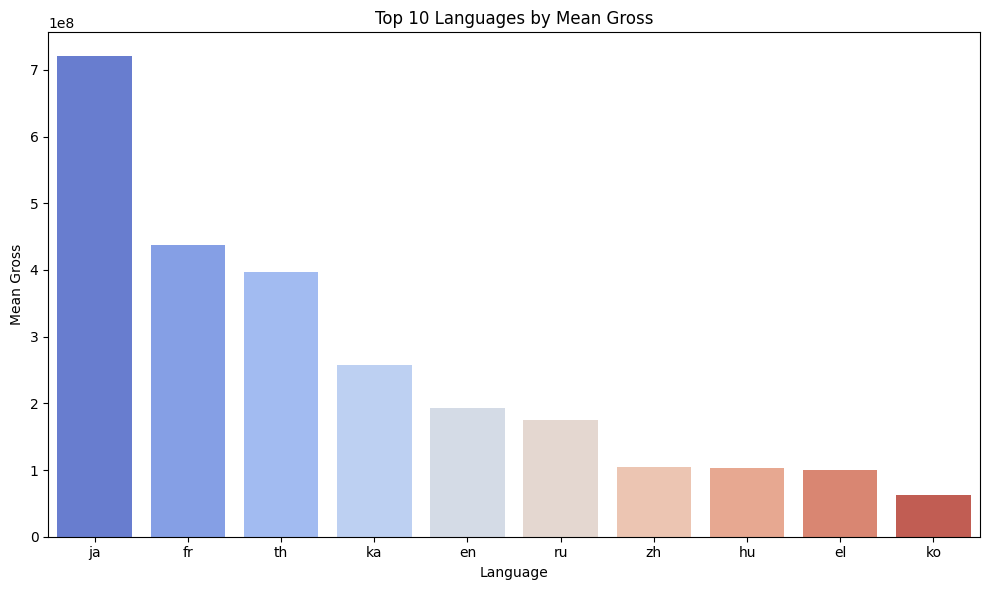

Top 10 Languages by Mean Gross:
                     mean_gross  count
original_language                     
ja                 7.203289e+08     17
fr                 4.380211e+08    442
th                 3.964966e+08     13
ka                 2.576416e+08      9
en                 1.929443e+08  23252
ru                 1.751688e+08    933
zh                 1.039804e+08     79
hu                 1.023065e+08      4
el                 9.962487e+07      9
ko                 6.215431e+07      3


In [171]:
# Top languages by mean gross
top_langs = lang_gross_df.head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_langs.index, y=top_langs['mean_gross'], palette='coolwarm')
plt.title('Top 10 Languages by Mean Gross')
plt.xlabel('Language')
plt.ylabel('Mean Gross')
plt.tight_layout()
plt.show()
print("Top 10 Languages by Mean Gross:")
print(top_langs[['mean_gross', 'count']])

In [172]:
# Top markets (production companies) by mean gross (if available)
if 'prod_market_stats' in locals():
    top_markets = prod_market_stats.head(10)
    plt.figure(figsize=(12,6))
    sns.barplot(x=top_markets.index, y=top_markets['mean_gross'], palette='Spectral')
    plt.title('Top 10 Production Companies by Mean Gross')
    plt.xlabel('Production Company')
    plt.ylabel('Mean Gross')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
    print("Top 10 Production Companies by Mean Gross:")
    print(top_markets[['mean_gross', 'count']])

**Summary Tables and Visuals:**  
- The above charts and tables highlight the most profitable genres, the highest-rated genres, the most successful and consistent directors, and the top languages and markets by revenue.
